In [ ]:
# Importing all necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Using data from Apple's stock.
df = pd.read_csv('/content/sample_data/all_stocks_5yr.csv')

In [ ]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500.0,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000.0,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000.0,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500.0,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900.0,AAL


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130934 entries, 0 to 130933
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    130934 non-null  object 
 1   open    130933 non-null  float64
 2   high    130933 non-null  float64
 3   low     130933 non-null  float64
 4   close   130933 non-null  float64
 5   volume  130933 non-null  float64
 6   Name    130933 non-null  object 
dtypes: float64(5), object(2)
memory usage: 7.0+ MB


In [ ]:
df.describe()

,open,high,low,close,volume
count,130933.000000,130933.000000,130933.000000,130933.000000,1.309330e+05
mean,95.710231,96.599171,94.800654,95.729004,4.929496e+06
std,106.989635,107.962399,105.952140,106.980420,1.312697e+07
min,1.620000,1.690000,1.500000,1.590000,3.000000e+00
25%,43.055000,43.500000,42.670000,43.100000,1.031314e+06
50%,64.840000,65.430000,64.270000,64.850000,2.002776e+06
75%,109.790000,110.710000,108.740000,109.790000,3.921802e+06
max,1477.390000,1498.000000,1450.040000,1450.890000,3.750886e+08


In [ ]:
df.shape

(130934, 7)

**EDA**

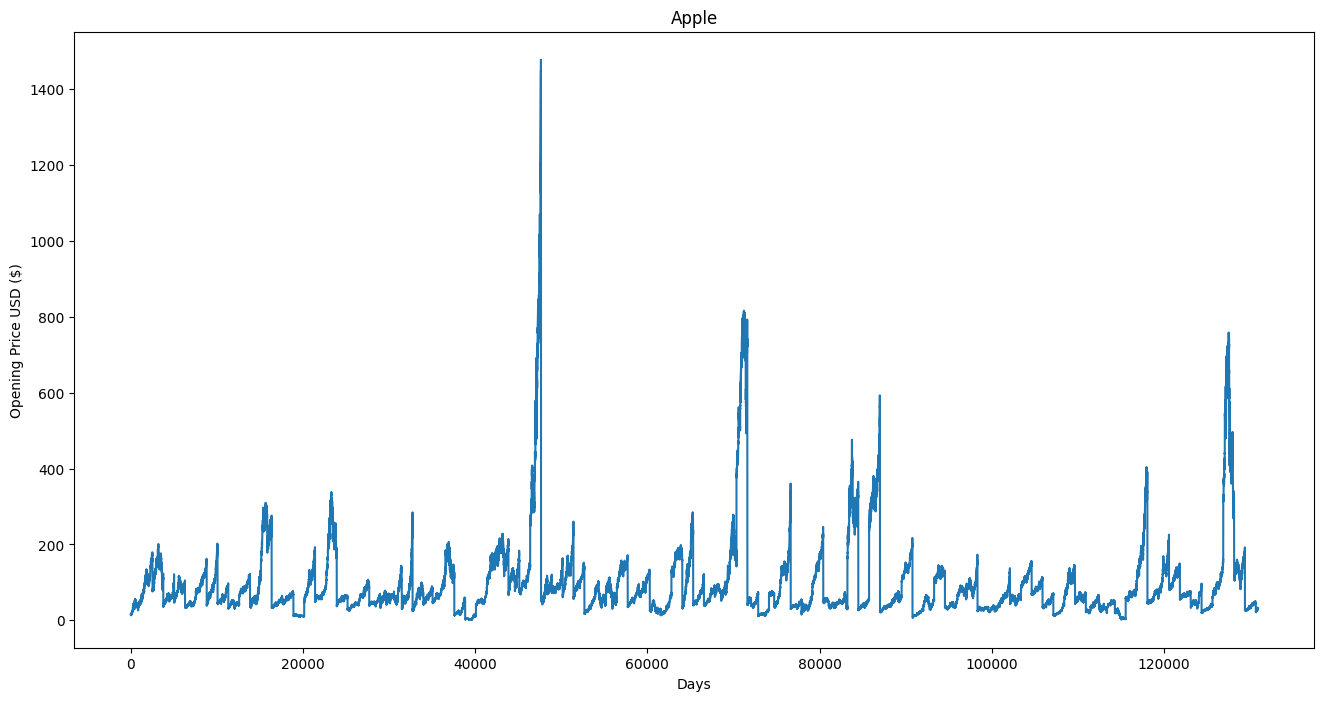

In [ ]:
# Visualizing the opening prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Opening Price USD ($)')
plt.plot(df['open'])
plt.show()

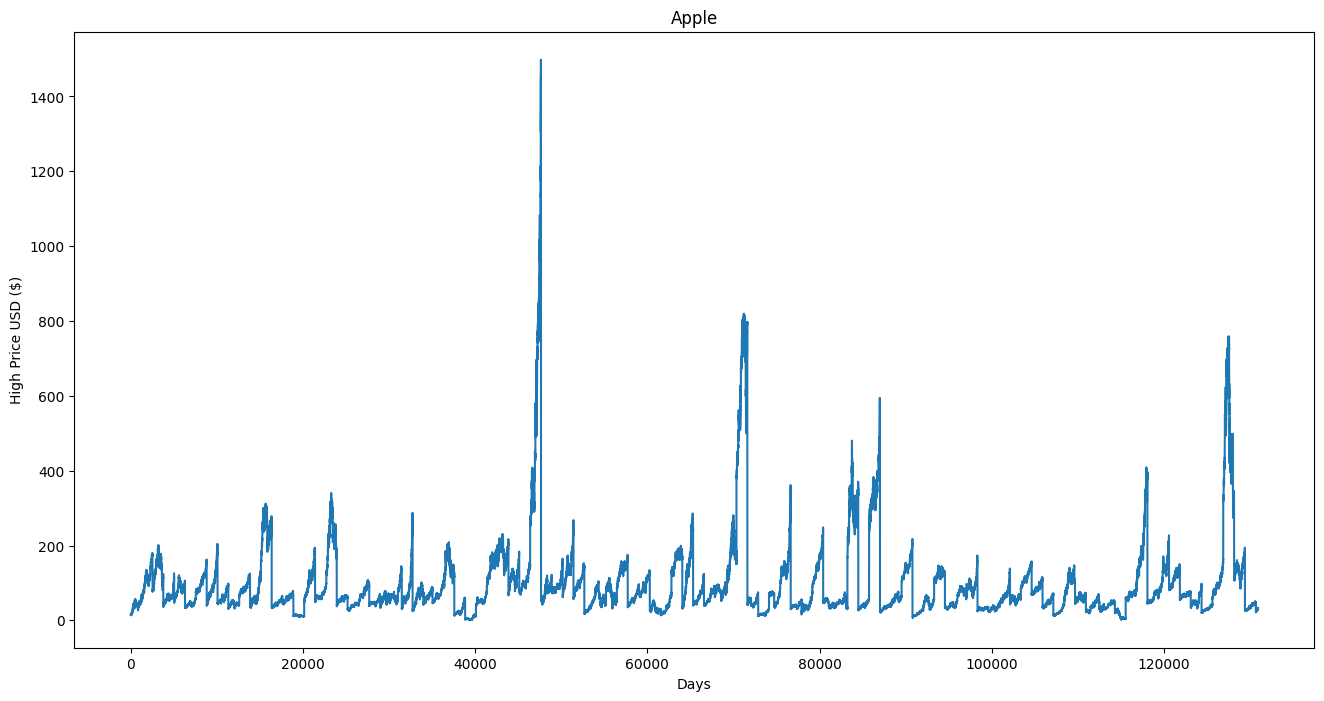

In [ ]:
# Visualizing the high prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('High Price USD ($)')
plt.plot(df['high'])
plt.show()

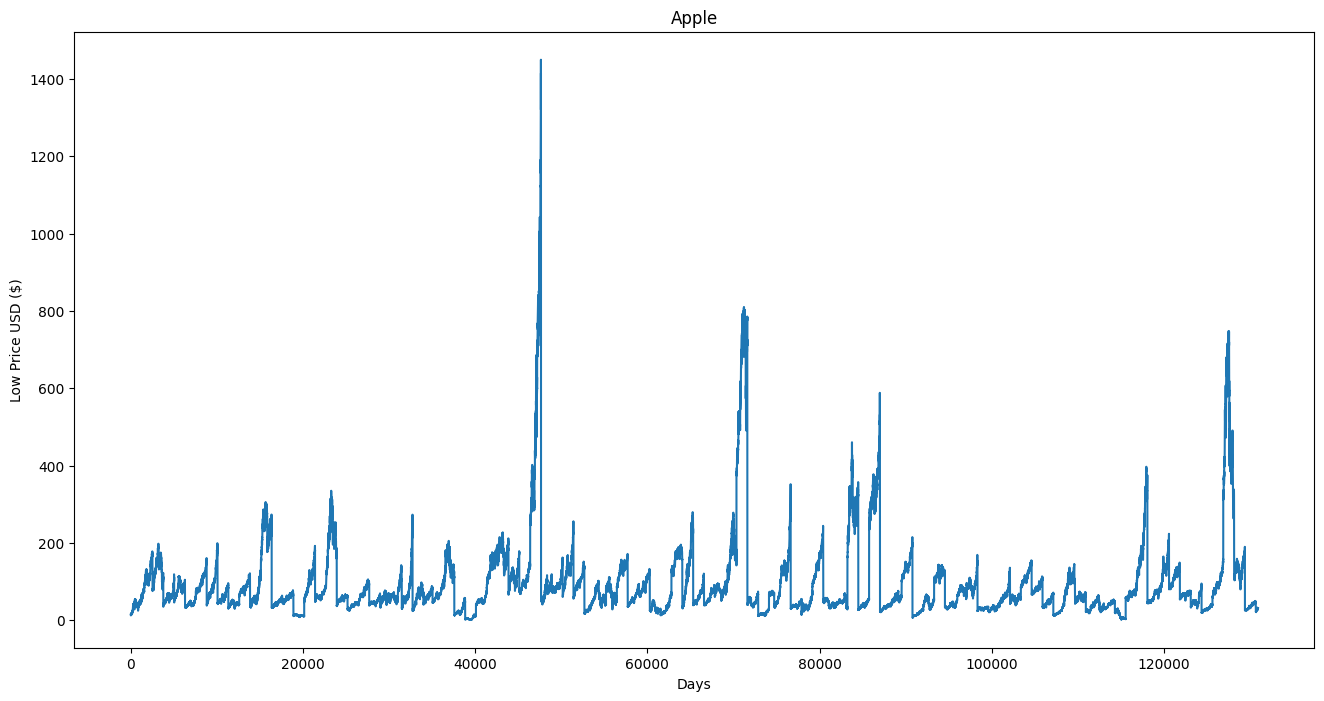

In [ ]:
# Visualizing the low prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Low Price USD ($)')
plt.plot(df['low'])
plt.show()

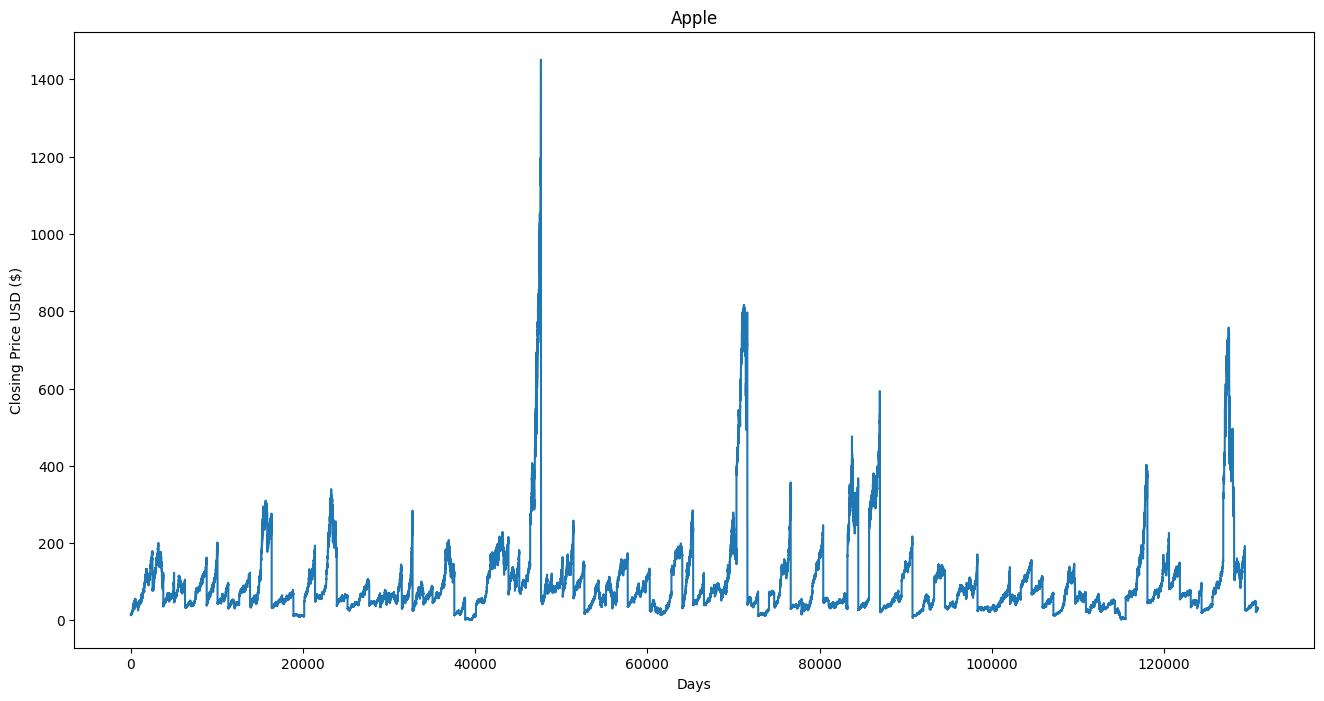

In [ ]:
# Visualizing the closing prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(df['close'])
plt.show()

In [ ]:
df2 = df['close']

In [ ]:
df2.tail()

,close
130929,31.690
130930,31.280
130931,31.400
130932,31.425
130933,NaN


In [ ]:
df2 = pd.DataFrame(df2)

In [ ]:
df2.tail()

,close
130929,31.690
130930,31.280
130931,31.400
130932,31.425
130933,NaN


In [ ]:
# Prediction 100 days into the future.
future_days = 100
df2['Prediction'] = df2['close'].shift(-future_days)

In [ ]:
df2.tail()

,close,Prediction
130929,31.690,NaN
130930,31.280,NaN
130931,31.400,NaN
130932,31.425,NaN
130933,NaN,NaN


In [ ]:
X = np.array(df2.drop(['Prediction'], axis=1))[:-future_days]
print(X)

[[14.75 ]
 [14.46 ]
 [14.27 ]
 ...
 [32.15 ]
 [32.285]
 [32.775]]


In [ ]:
y = np.array(df2['Prediction'])[:-future_days]
print(y)

[16.75  16.84  16.94  ... 31.4   31.425    nan]


**Linear and Decision Tree Regression**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
# Remove rows with NaN values from both X and y
X = X[~np.isnan(y)]
y = y[~np.isnan(y)]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Now you can fit the model without encountering the error
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [ ]:
x_future = df2.drop(['Prediction'], axis=1)[:-future_days] # Changed 1 to axis=1

In [ ]:
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[25.845],
       [26.075],
       [25.93 ],
       [25.245],
       [25.385],
       [25.445],
       [25.67 ],
       [25.03 ],
       [25.615],
       [25.465],
       [25.625],
       [24.75 ],
       [24.435],
       [24.54 ],
       [23.965],
       [24.155],
       [24.855],
       [25.095],
       [24.775],
       [24.67 ],
       [25.085],
       [25.22 ],
       [25.405],
       [25.99 ],
       [25.83 ],
       [25.19 ],
       [25.04 ],
       [24.92 ],
       [24.655],
       [24.685],
       [25.98 ],
       [26.23 ],
       [26.27 ],
       [26.57 ],
       [26.41 ],
       [26.88 ],
       [27.245],
       [27.355],
       [27.28 ],
       [27.28 ],
       [27.21 ],
       [27.49 ],
       [27.7  ],
       [27.56 ],
       [27.615],
       [27.74 ],
       [27.96 ],
       [29.105],
       [29.385],
       [28.63 ],
       [28.04 ],
       [28.025],
       [28.045],
       [27.735],
       [28.05 ],
       [28.495],
       [28.825],
       [28.94 ],
       [28.42 

In [ ]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[34.67111322 34.87139929 34.74513199 34.14862783 34.27054109 34.32278963
 34.51872165 33.9614039  34.47082716 34.34020581 34.47953525 33.71757739
 33.44327256 33.5347075  33.03399234 33.19944604 33.80901233 34.01800649
 33.73934761 33.64791267 34.0092984  34.12685761 34.28795727 34.79738052
 34.65805109 34.10073334 33.97011199 33.86561491 33.63485053 33.6609748
 34.78867243 35.00637468 35.04120704 35.30244973 35.1631203  35.57240052
 35.8902458  35.98603479 35.92072411 35.92072411 35.85976748 36.103594
 36.28646388 36.16455063 36.21244512 36.32129624 36.51287422 37.5099505
 37.75377702 37.09631624 36.58253894 36.5694768  36.58689298 36.3169422
 36.59124703 36.97875702 37.26612399 37.36626702 36.91344635 37.10937837
 37.24870781 37.03100556 37.07454601 36.77411691 36.34306647 36.52593635
 36.66091175 36.94827871 36.72186838 36.93957062 37.24435376 37.30966444
 37.11373242 37.20081332 37.52736668 37.04842174 37.36626702 38.00195758
 37.99760353 37.74506893 37.72765275 37.70588253 38.2414

In [ ]:
# Make prediction using the decision tree model
tree_prediction = tree.predict(x_future)

predictions = tree_prediction
valid = df2[X.shape[0]:]
# Ensure the 'Predictions' column is the same length as the DataFrame
if len(valid) == len(predictions):
    valid['Predictions'] = predictions
else:
    print(f"Warning: Length mismatch! DataFrame length: {len(valid)}, Predictions length: {len(predictions)}")
    # Handle the mismatch, e.g., truncate the longer array or investigate the cause of the mismatch

In [ ]:
# Make prediction using the decision tree model
tree_prediction = tree.predict(x_future)

predictions = tree_prediction
valid = df2[X.shape[0]:]
# Ensure the 'Predictions' column is the same length as the DataFrame
if len(valid) == len(predictions):
    valid['Predictions'] = predictions
else:
    print(f"Warning: Length mismatch! DataFrame length: {len(valid)}, Predictions length: {len(predictions)}")
    # Handle the mismatch, e.g., truncate the longer array or investigate the cause of the mismatch

    # If the mismatch is due to different lengths, you can either truncate the longer array or investigate the cause of the mismatch.
    # Here's an example of how to truncate the longer array to match the shorter one:
    min_len = min(len(valid), len(predictions))
    valid = valid[:min_len] # Change this line to truncate the DataFrame instead of predictions
    valid['Predictions'] = predictions[:min_len]

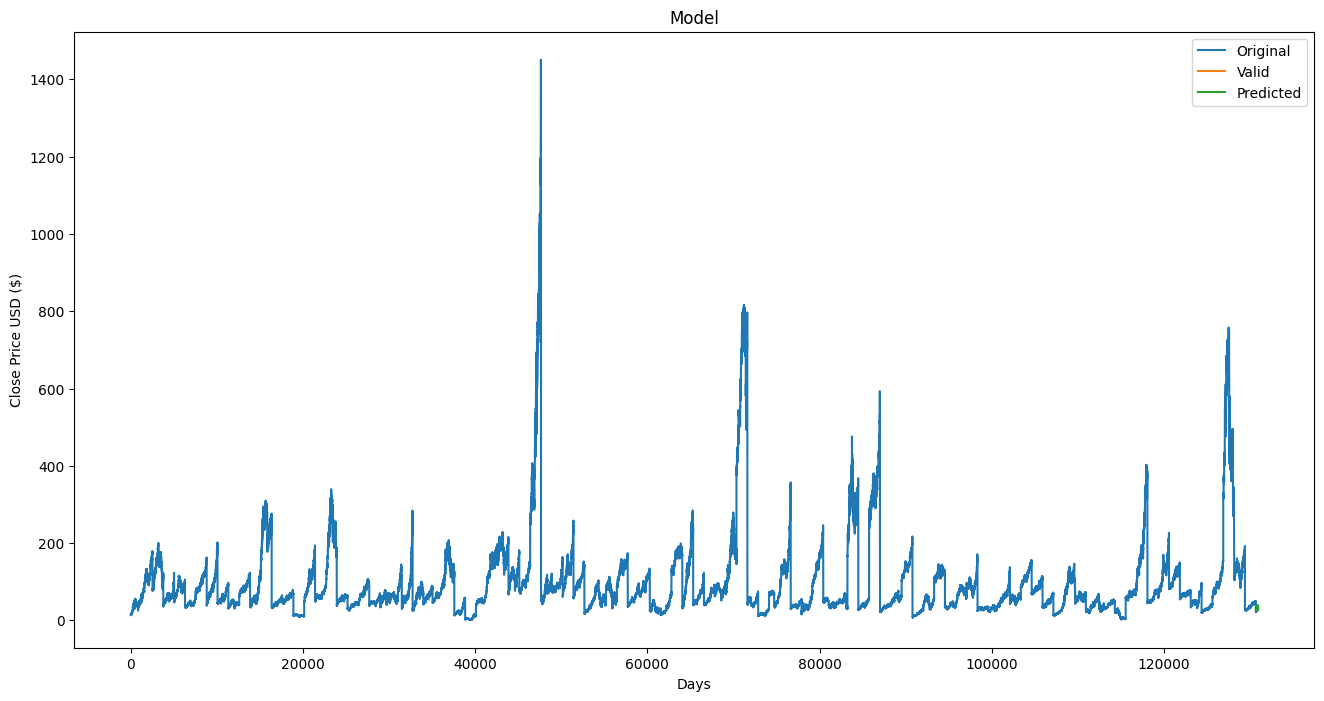

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df2['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()